Đang đọc file mới nhất: evaluation_results\scores_20251129_170635.csv


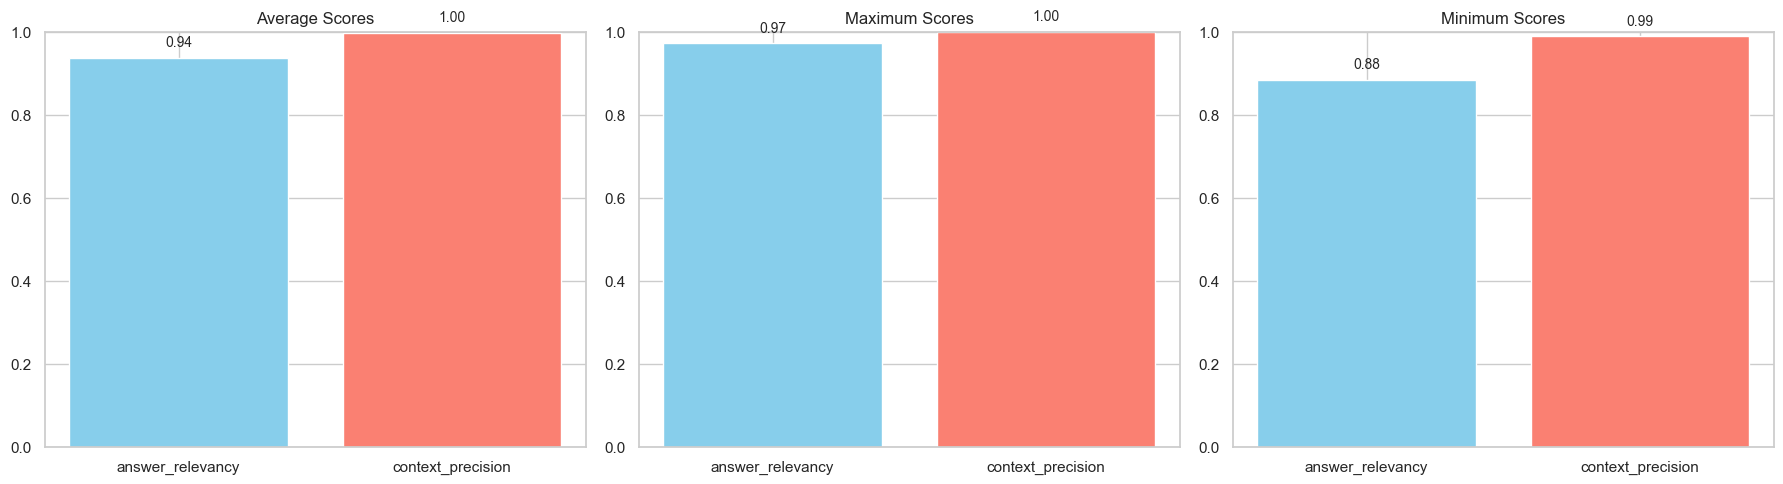

In [6]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# -------------------
# Đọc file CSV mới nhất
# -------------------
def read_latest_csv(folder="evaluation_results"):
    list_of_files = glob.glob(os.path.join(folder, "*.csv"))
    latest_file = max(list_of_files, key=os.path.getctime)
    print(f"Đang đọc file mới nhất: {latest_file}")
    df = pd.read_csv(latest_file)
    return df

df = read_latest_csv()

# Chỉ lấy 2 cột cần thiết
metrics = ["answer_relevancy", "context_precision"]
df_metrics = df[metrics].copy()
df_metrics.fillna(0, inplace=True)

# -------------------
# Tính các giá trị trung bình, max, min
# -------------------
avg_scores = df_metrics.mean()
max_scores = df_metrics.max()
min_scores = df_metrics.min()

# -------------------
# Vẽ bar chart với giá trị hiển thị trên bar
# -------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

def plot_with_values(ax, data, title, colors):
    bars = ax.bar(data.index, data.values, color=colors)
    ax.set_title(title)
    ax.set_ylim(0, 1)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}", 
                ha='center', va='bottom', fontsize=10)

# Vẽ từng chart
colors = ["skyblue", "salmon"]
plot_with_values(axes[0], avg_scores, "Average Scores", colors)
plot_with_values(axes[1], max_scores, "Maximum Scores", colors)
plot_with_values(axes[2], min_scores, "Minimum Scores", colors)

plt.tight_layout()
plt.show()
